2025-03-16 13:34:04.076896: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 13:34:04.222943: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 13:34:04.400167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742128444.575632   30755 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742128444.629991   30755 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742128444.944704   30755 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9171 - loss: 0.1982
Précision du modèle : 0.92
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


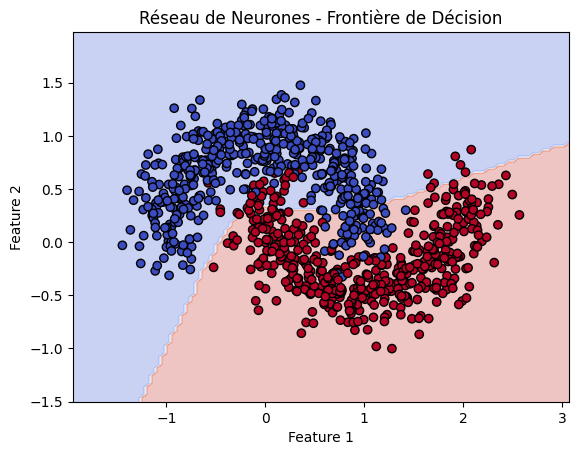

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Génération d'un dataset en forme de lune
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle
model = keras.Sequential([
    keras.layers.Dense(10, activation="relu", input_shape=(2,)),  # Couche cachée avec 10 neurones
    keras.layers.Dense(10, activation="relu"),  # Deuxième couche cachée
    keras.layers.Dense(1, activation="sigmoid")  # Couche de sortie (classification binaire)
])

# Compilation du modèle
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entraînement
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Évaluation
loss, acc = model.evaluate(X_test, y_test)
print(f"Précision du modèle : {acc:.2f}")

# Visualisation de la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Réseau de Neurones - Frontière de Décision")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Affichage
plot_decision_boundary(model, X, y)
